<h1 style="font-size: 18px;"> Tesla Stock Dataset from 2010 to 2021</h1>
<span style="font-size: 14px;">Source: https://www.kaggle.com/datasets/abhimaneukj/tesla-inc-tsla-dataset</span>

# <h1 style="font-size: 18px;">Info</h1>

Columns:
  - Date: represents the date at which the share is traded in the stock market.
  - Open: represents the opening price of the stock at a particular date. It is the price at which a stock started trading when the opening bell rang.
  - Close: represents the closing price of the stock at a particular date. It is the last buy-sell order executed between two traders. The closing prices is the raw price, which is just the cash of the last transacted price before the market closes.
  - High: the high is the highest price at which a stock is traded during a period. Here the period is a day.
  - Low: the low is the lowest price at which a stock is traded during a period. Here the period is a day.
  - Adj Close: the adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. The adjusted closing price factors in corporate actions, such as stock splits, dividends, and rights offerings.
  - Volume: volume is the number of shares of security traded during a given period of time. Here the security is stock and the period of time is a day.

# <h1 style="font-size: 18px;">Library</h1>

In [ ]:

import pandas as pd
import numpy as np
import warnings

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Model
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Temporal Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.fft import fft, ifft
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
# Import Data
df = pd.read_csv("TSLA.csv")

In [ ]:
# Transform Date column to Datetime
df["Date"] = pd.to_datetime(df["Date"])

# Ajusta os valores para 2 casas decimais
df[["Open", "High", "Low", "Close", "Adj Close"]] = df[
    ["Open", "High", "Low", "Close", "Adj Close"]
].apply(round, args=(2,))

In [ ]:
# Plot temporal chart for each independent variable
# Adjusting the figure size
fig = plt.subplots(figsize=(16, 5))

# Creating a plot
plt.plot(df["Date"], df["Close"])

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=12)
plt.title("Close Values", fontsize=14)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=30, fontsize=10)

plt.show()

In [ ]:
df_2020 = df[df["Date"].dt.year >= 2020]
df_2020 = df_2020.reset_index(level=None, drop=True)
df_2019 = df[df["Date"].dt.year < 2020]
df_2019 = df_2019.reset_index(level=None, drop=True)

In [ ]:
# Plot temporal chart for each independent variable
# Adjusting the figure size
fig = plt.subplots(figsize=(16, 5))

# Creating a plot
plt.plot(df_2020["Date"], df_2020["Close"])

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=12)
plt.title("Close Values", fontsize=14)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=30, fontsize=10)

plt.show()

# <h1 style="font-size: 18px;">Correlation Closing Price x Volume</h1>

In [ ]:
import numpy as np
from scipy.stats import spearmanr, kendalltau

# Correlação de Spearman
spearman_corr, _ = spearmanr(df_2020["Close"], df_2020["Volume"])
print(f'Coeficiente de correlação de Spearman: {spearman_corr}')
spearman_coef = np.polyfit(df_2020["Close"], df_2020["Volume"], 1)
print(f'Equação da linha de regressão: y = {
    round(spearman_coef[0], 3)
    }x + {
        round(spearman_coef[1], 3)
        }')

print()

# Correlação de Kendall
kendall_corr, _ = kendalltau(df_2020["Close"], df_2020["Volume"])
print(f'Coeficiente de correlação de Kendall: {kendall_corr}')
kendall_coef = np.polyfit(df_2020["Close"], df_2020["Volume"], 1)
print(f'Equação da linha de regressão: y = {
    round(kendall_coef[0], 3)
    }x + {
        round(kendall_coef[1], 3)
        }')

In [ ]:
# Plotagem do gráfico
plt.figure(figsize=(15,6))
plt.scatter(df_2020["Close"], df_2020["Volume"], color='blue', label='Dados')
plt.plot(df_2020["Close"], np.polyval(kendall_coef, df_2020["Close"]), color='red', label='Linha de Regressão')
plt.xlabel('Close')
plt.ylabel('Volume')
plt.title('Gráfico de Dispersão e Linha de Regressão')
plt.legend()
plt.show()

# <h1 style="font-size: 18px;">Early Analysis</h1>

In [ ]:
# Plot density curve
sns.kdeplot(df_2020, x="Close")
plt.show()

In [ ]:
# Plot boxplot for outliers
sns.boxplot(df_2020, x="Close")
plt.show()

# <h1 style="font-size: 18px;">RSI</h1>

In [ ]:
def calcular_rsi(data, periodo=14):
    delta = data['Close'].diff()
    
    ganho = delta.where(delta > 0, 0)
    perda = -delta.where(delta < 0, 0)
    
    ganho_medio = ganho.rolling(window=periodo, min_periods=1).mean()
    perda_media = perda.rolling(window=periodo, min_periods=1).mean()
    
    rs = ganho_medio / perda_media
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

df_2020["RSI"] = calcular_rsi(df_2020)

df_2020

In [ ]:
# Create column with RSI
df_2020["RSI"] = ta.momentum.RSIIndicator(df_2020["Close"], window=14).rsi()

In [ ]:
# Plot RSI
plt.figure(figsize=(15,10))

plt.plot(df_2020["Date"], df_2020["RSI"])

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=12)
plt.title("RSI", fontsize=14)

plt.fill_between(
    df_2020["Date"],
    70,
    max(df_2020["RSI"].dropna()),
    alpha=0.2,
    label="Overbought"
)

plt.fill_between(
    df_2020["Date"],
    min(df_2020["RSI"].dropna()),
    30,
    alpha=0.2,
    label="Oversold"
)

plt.text(x=df_2020["Date"][0], y=71, s="Overbought",rotation=90)
plt.text(x=df_2020["Date"][0], y=min(df_2020["RSI"].dropna()), s="Oversold",rotation=90)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=30, fontsize=10)

plt.show()

In [ ]:
# Plot RSI
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.plot(df_2020["Date"], df_2020["RSI"], label="RSI", color="blue", alpha=0.25)
ax1.set_ylabel('RSI', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

ax1.fill_between(
    df_2020["Date"],
    70,
    max(df_2020["RSI"].dropna()),
    alpha=0.2,
    label="Overbought"
)

ax1.fill_between(
    df_2020["Date"],
    min(df_2020["RSI"].dropna()),
    30,
    alpha=0.2,
    label="Oversold"
)

ax1.text(x=df_2020["Date"][0], y=71, s="Overbought",rotation=90)
ax1.text(x=df_2020["Date"][0], y=min(df_2020["RSI"].dropna()), s="Oversold",rotation=90)

ax1.axhline(50)


ax2 = ax1.twinx()
ax2.plot(df_2020["Date"], df_2020["Close"], label="Close", color="red")
ax2.set_ylabel('Close', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Rotaing axis ticks and customizing their font size
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.title("RSI x Stock Price - Close", fontsize=14)

plt.show()

# <h1 style="font-size: 18px;">Diary Return</h1>

In [ ]:
# Create column with % Diary Return
df_2020["Diary_Return"] = df_2020["Close"].pct_change()

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df_2020["Date"], df_2020["Diary_Return"])

# Adding axis labels and customizing their font size
plt.title("Diary Return", fontsize=14)

plt.show()

# <h1 style="font-size: 18px;">Seasonal</h1>

In [ ]:
# Seasonal Decompose
decomposition = seasonal_decompose(df_2020["Close"], model="additive", period=12)

# Decompose of temporal series

plt.figure(figsize=(12, 12))
plt.subplot(411)
plt.plot(df_2020["Close"])
plt.title("Original")

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title("Trend")

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title("Seasonal")

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title("Residual")

plt.tight_layout()
plt.show()

In [ ]:
decomposition.resid.fillna(0).tolist()

In [ ]:
def seasonal_decompose_residuals(_arg1:list, _arg2:list):
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(_arg1, model="additive", period=_arg2[0])
    resid = pd.Series(decomposition.resid).fillna(0)
    return resid.tolist()

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df_2020["Date"], seasonal_decompose_residuals(df_2020["Close"].tolist(), [12]))
plt.show()

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(211)
plt.plot(df_2020["Close"]-decomposition.resid, color="red", label="Close Without Residuals")
plt.plot(df_2020["Close"], color="blue", label="Close Original", alpha=0.3)
plt.legend()

plt.subplot(212)
plt.plot(df_2020["Close"]-decomposition.seasonal, color="red", label="Close Without Seasonal")
plt.plot(df_2020["Close"], color="blue", label="Close Original")
plt.legend()

plt.show()

# <h1 style="font-size: 18px;">Autocorrelation</h1>

In [ ]:
# Autocorrelation ACF
for year in set(df_2020["Date"].dt.year):
    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    plot_acf(df_2020[df_2020["Date"].dt.year == year]["Close"], ax=ax1)
    ax1.set_title(f"Autocorrelation - {year}")
    plt.show()

# <h1 style="font-size: 18px;">Fourier Analysis</h1>

In [ ]:
# Apply FFT
fft_values = fft(df_2020["Close"])
frequencies = np.fft.fftfreq(len(fft_values))

# Calculate the magnitude of the FFT values
magnitude_fft_values = np.abs(fft_values)


# Set a higher threshold to retain more significant frequencies
threshold = np.mean(magnitude_fft_values) * 0.5
filtered_fft_values = np.where(magnitude_fft_values > threshold, fft_values, 0)

# Filter and reconstruct the signal
reconstructed_signal = ifft(filtered_fft_values)

# Plot original and reconstructed data
plt.figure(figsize=(25, 10))
plt.plot(df_2020["Date"], df_2020["Close"], label='Original Data', marker='o')
plt.plot(df_2020["Date"], reconstructed_signal, label='Reconstructed Signal', marker='x')
plt.legend()
plt.title('Fourier Analysis of Stock Prices')
plt.plot()

# <h1 style="font-size: 18px;">Moving Average - SMA</h1>

In [ ]:
# Calculate the moving average with a window of 10 days
mov_avg_window = 14
df_2020['Moving_Average'] = df_2020["Close"].rolling(window=mov_avg_window).mean()

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df_2020["Date"], df_2020["Moving_Average"], color="red", label="Moving Average")
plt.plot(df_2020["Date"], df_2020["Close"], color="blue", label="Original", alpha=0.25)
plt.plot(df_2020["Date"], df_2020["Close"] - decomposition.resid, color="green", label="Original Minus Residuals")
plt.xticks(rotation=30, fontsize=8)
plt.legend()
plt.show()

# <h1 style="font-size: 18px;">Exponencial Moving Average - EMA</h1>

In [ ]:
# Definir o período da EMA
periodo_ema = 5

# Calcular a EMA
df_2020["EMA"] = df_2020["Close"].ewm(span=periodo_ema, adjust=False).mean()

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(df_2020, x="Date", y="EMA", label="EMA 5 days")
sns.lineplot(df_2020, x="Date", y="Close", label="Original Values")
plt.legend()
plt.show()

# <h1 style="font-size: 18px;">Moving Average Convergence Divergence - MACD</h1>

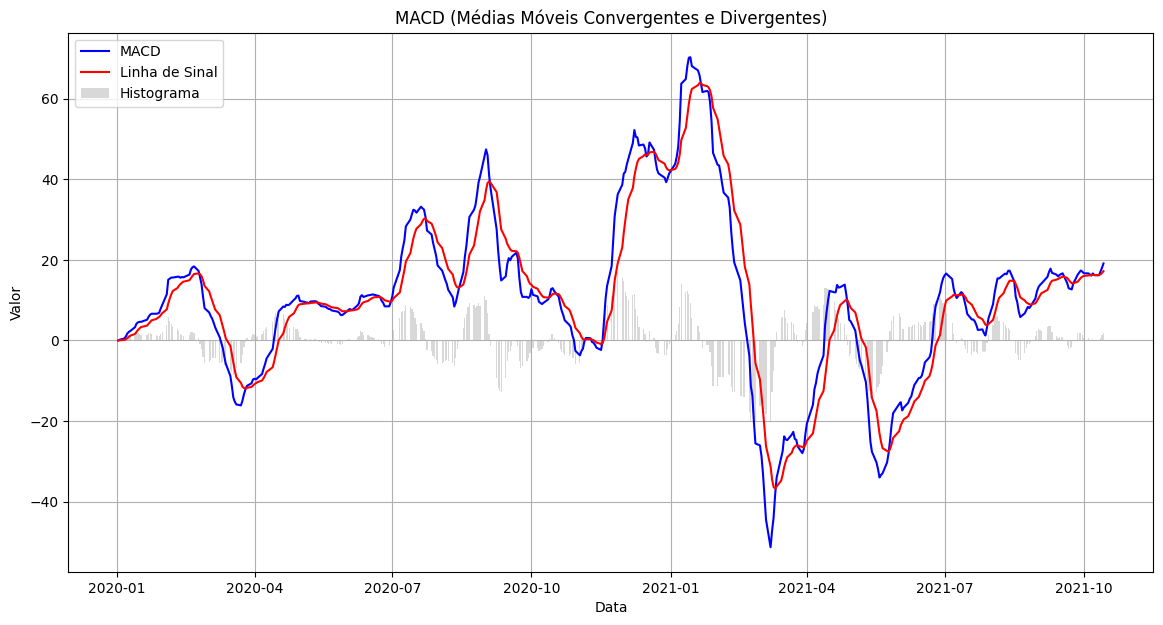

In [6]:
# Calcular as Médias Móveis Exponenciais (EMA)
ema_12 = df_2020["Close"].ewm(span=12, adjust=False).mean()
ema_26 = df_2020["Close"].ewm(span=26, adjust=False).mean()

# Calcular a linha MACD
macd = ema_12 - ema_26

# Calcular a linha de sinal
signal_line = macd.ewm(span=9, adjust=False).mean()

# Calcular o histograma MACD
histogram = macd - signal_line

# Plotar os resultados
plt.figure(figsize=(14, 7))
plt.plot(df_2020["Date"], macd, label='MACD', color='blue')
plt.plot(df_2020["Date"], signal_line, label='Linha de Sinal', color='red')
plt.bar(df_2020["Date"], histogram, label='Histograma', color='gray', alpha=0.3)

plt.title('MACD (Médias Móveis Convergentes e Divergentes)')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

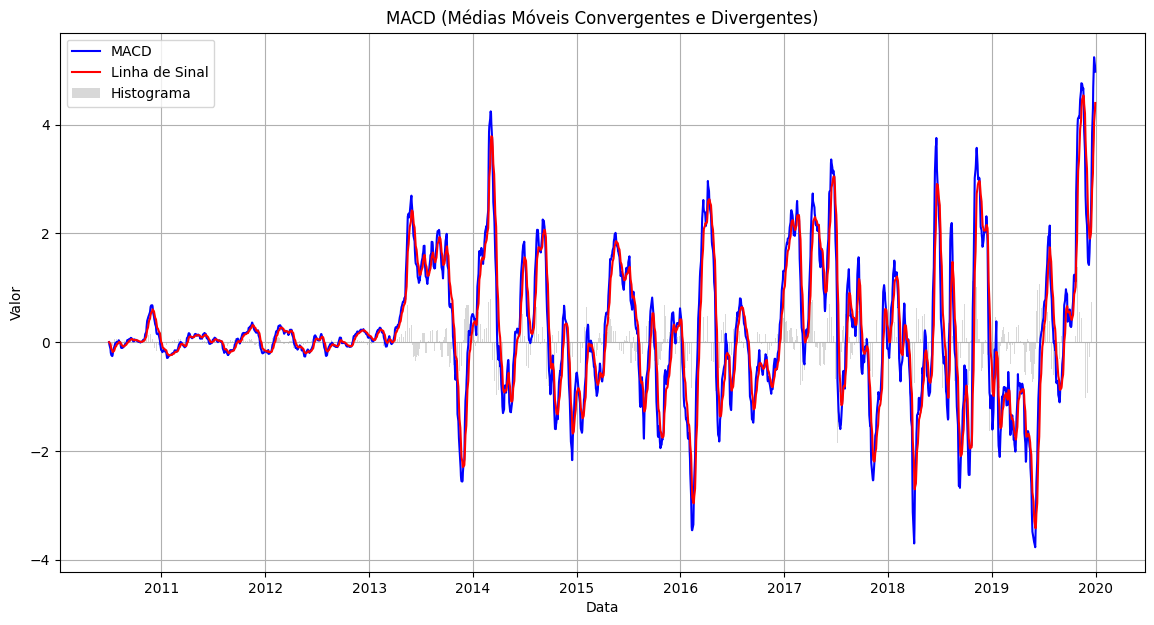

In [8]:
# Calcular as Médias Móveis Exponenciais (EMA)
ema_12 = df_2019["Close"].ewm(span=12, adjust=False).mean()
ema_26 = df_2019["Close"].ewm(span=26, adjust=False).mean()

# Calcular a linha MACD
macd = ema_12 - ema_26

# Calcular a linha de sinal
signal_line = macd.ewm(span=9, adjust=False).mean()

# Calcular o histograma MACD
histogram = macd - signal_line

# Plotar os resultados
plt.figure(figsize=(14, 7))
plt.plot(df_2019["Date"], macd, label="MACD", color="blue")
plt.plot(df_2019["Date"], signal_line, label="Linha de Sinal", color="red")
plt.bar(df_2019["Date"], histogram, label="Histograma", color="gray", alpha=0.3)

plt.title("MACD (Médias Móveis Convergentes e Divergentes)")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

# <h1 style="font-size: 18px;">Identify Graphic Patterns</h1>

In [ ]:
import ta

# Calcular as Médias Móveis Simples (SMA) para identificação de padrões
df_2020['SMA_50'] = df_2020['Close'].rolling(window=50).mean()
df_2020['SMA_200'] = df_2020['Close'].rolling(window=200).mean()

# Calcular o MACD
df_2020['MACD'] = ta.trend.macd(df_2020['Close'])
df_2020['MACD_Signal'] = ta.trend.macd_signal(df_2020['Close'])
df_2020['MACD_Hist'] = df_2020['MACD'] - df_2020['MACD_Signal']

# Identificar padrões de triângulo simétrico (simplificado)
df_2020['High_Peak'] = df_2020["High"][df_2020["High"] == df_2020["High"].rolling(window=5, center=True).max()]
df_2020['Low_Trough'] = df_2020['Low'][df_2020['Low'] == df_2020['Low'].rolling(window=5, center=True).min()]

# Plotar os resultados
plt.figure(figsize=(20, 10))
plt.plot(df_2020["Date"], df_2020['Close'], label='Closing Price')
plt.plot(df_2020["Date"], df_2020['SMA_50'], label='SMA 50', color='blue', linestyle='--')
plt.plot(df_2020["Date"], df_2020['SMA_200'], label='SMA 200', color='orange', linestyle='--')

# Plotar os picos e vales identificados
plt.scatter(df_2020["Date"], df_2020['High_Peak'], label='Peaks', color='red', marker='^', alpha=1)
plt.scatter(df_2020["Date"], df_2020['Low_Trough'], label='Valleys', color='green', marker='v', alpha=1)

plt.title('Identify Graphic Patterns')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.2)
plt.show()

# <h1 style="font-size: 18px;">ARIMA</h1>

## <h1 style="font-size: 18px;">Transformação em Estacionária</h1>

In [ ]:
# Plot original data and moving average
plt.figure(figsize=(25, 10))  # Correct usage of plt.figure()
plt.plot(df_2020["Date"], df_2020["Close"], label='Original Data')
plt.plot(df_2020["Date"], df_2020['Moving_Average'], label=f'Moving Average ({mov_avg_window} days)')
plt.legend()
plt.title('Stock Prices with Moving Average')
plt.show()

In [ ]:
# 1. Verificar estacionariedade
resultado_adf = adfuller(df_2020["Moving_Average"].dropna())
print(f'ADF Statistic: {resultado_adf[0]}')
print(f'p-value: {resultado_adf[1]}') # Se o valor-p > 0.05, a série não é estacionária.
print(f'Used Lag: {resultado_adf[2]}')
print(f'Nobs: {resultado_adf[3]}')
print(f'Critical Values: {resultado_adf[4]}')
print(f'Icbest: {resultado_adf[5]}')

### <h1 style="font-size: 18px;">Differential</h1>

In [ ]:
df_2020["Differential"] = df_2020["Close"].diff()

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(df_2020, x="Date", y="Differential")
plt.title('Differential of Close Values')
plt.show()

In [ ]:
resultado_adf = adfuller(df_2020["Differential"].dropna())
print(f'ADF Statistic: {resultado_adf[0]}')
print(f'p-value: {resultado_adf[1]}') # Se o valor-p > 0.05, a série não é estacionária.
print(f'Used Lag: {resultado_adf[2]}')
print(f'Nobs: {resultado_adf[3]}')
print(f'Critical Values: {resultado_adf[4]}')
print(f'Icbest: {resultado_adf[5]}')

### <h1 style="font-size: 18px;">Remove Tendence</h1>

In [ ]:
p1 = np.polyfit(df_2020.index, df_2020["Close"], 1)
y1_fit = np.polyval(p1, df_2020.index)

p2 = np.polyfit(df_2020.index, df_2020["Close"], 2)
y2_fit = np.polyval(p2, df_2020.index)

p3 = np.polyfit(df_2020.index, df_2020["Close"], 3)
y3_fit = np.polyval(p3, df_2020.index)

In [ ]:
plt.figure(figsize=(25,10))
plt.scatter(df_2020.index, df_2020["Close"], label='Dados Originais')
plt.plot(df_2020.index, y1_fit, label='Ajuste Linear (grau 1)')
plt.plot(df_2020.index, y2_fit, label='Ajuste Quadrático (grau 2)')
plt.plot(df_2020.index, y3_fit, label='Ajuste Cúbico (grau 3)')
plt.legend()
plt.show()

In [ ]:
for i in [y1_fit, y2_fit, y3_fit]:
    resultado_adf = adfuller(i)
    print(f'ADF Statistic: {resultado_adf[0]}')
    print(f'p-value: {resultado_adf[1]}') # Se o valor-p > 0.05, a série não é estacionária.
    print(f'Used Lag: {resultado_adf[2]}')
    print(f'Nobs: {resultado_adf[3]}')
    print(f'Critical Values: {resultado_adf[4]}')
    print(f'Icbest: {resultado_adf[5]}')
    print()

### <h1 style="font-size: 18px;">Seasonal Differential - Best Result</h1>

In [ ]:
df_2020["Season_Diff"] = df_2020["Close"].diff(periods=2)

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(df_2020, x="Date", y="Season_Diff")
plt.title('Seasonal Differential of Close Values')
plt.show()

In [ ]:
resul_adf = adfuller(df_2020["Season_Diff"].dropna())
print(f'ADF Statistic: {resul_adf[0]}')
print(f'p-value: {resul_adf[1]}') # Se o valor-p > 0.05, a série não é estacionária.
print(f'Used Lag: {resul_adf[2]}')
print(f'Nobs: {resul_adf[3]}')
print(f'Critical Values: {resul_adf[4]}')
print(f'Icbest: {resul_adf[5]}')

### <h1 style="font-size: 18px;">Logarithmic Transformation</h1>

In [ ]:
df_2020["Log"] = np.log(df_2020["Close"])

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

ax1.plot(df_2020["Date"], df_2020["Close"])
ax1.set_title("Stock Price - Close")

ax2.plot(df_2020["Date"], df_2020["Log"])
ax2.set_title("Logarithmic Transformation of Close Values")

plt.show()

In [ ]:
resul_adf = adfuller(df_2020["Log"].dropna())
print(f'ADF Statistic: {resul_adf[0]}')
print(f'p-value: {resul_adf[1]}') # Se o valor-p > 0.05, a série não é estacionária.
print(f'Used Lag: {resul_adf[2]}')
print(f'Nobs: {resul_adf[3]}')
print(f'Critical Values: {resul_adf[4]}')
print(f'Icbest: {resul_adf[5]}')

## <h1 style="font-size: 18px;">KPSS</h1>

In [ ]:
# Realizando o teste KPSS
with warnings.catch_warnings(record=True) as w:
    result = kpss(df_2020["Differential"].dropna(), regression='ct')  # 'c' para constante, 'ct' para tendência
    if w:
        print(f"Aviso: {w[0].message}")
    print(f"Estatística KPSS: {result[0]}")
    print(f"p-valor: {result[1]}")
    print(f"Valores críticos: {result[3]}")

    # Interpretação
    if result[0] > result[3]['5%']:
        print("Rejeita H0: A série NÃO é estacionária.")
    else:
        print("Não rejeita H0: A série é estacionária.")

In [ ]:
# 2. Plotar ACF e PACF para identificar p e q

fig, (axs) = plt.subplots(2, 2, figsize=(12,5))

plot_acf(df_2020["Differential"], lags=10, ax=axs[0,0])
axs[0,0].set_title('ACF - Stationary')

plot_pacf(df_2020["Differential"], lags=10, ax=axs[0,1])
axs[0,1].set_title('PACF - Stationary')

plot_acf(df_2020["Close"], lags=10, ax=axs[1,0])
axs[1,0].set_title('ACF - Original')

plot_pacf(df_2020["Close"], lags=10, ax=axs[1,1])
axs[1,1].set_title('PACF - Original')

plt.tight_layout()
plt.show()

## <h1 style="font-size: 18px;">Model</h1>

In [ ]:
# 3. Ajustar o modelo ARIMA
modelo = ARIMA(df_2020["Close"], order=(1, 1, 1))  # (p, d, q)
resultado = modelo.fit()

In [ ]:
print(resultado.summary())

In [ ]:
residuals = resultado.resid
plot_acf(residuals)
plot_pacf(residuals)
plt.show()

In [ ]:
# 4. Fazer previsões
previsoes = resultado.forecast(steps=12)
print(f"Previsões:\n{previsoes}")

In [ ]:
s_integrated = previsoes.cumsum()  # Soma cumulativa das diferenças
s_integrated = s_integrated.apply(lambda x: x+df_2020["Close"].iloc[-1])

print("\nSérie Reconstruída (invertendo .diff()):")
print(s_integrated)

In [ ]:
# 5. Plotar resultados
plt.figure(figsize=(20,10))
plt.plot(df_2020["Close"], label='Dados Reais')
plt.plot(previsoes, label='Previsão')
plt.legend()
plt.show()

In [ ]:
df_lagged = pd.DataFrame({
    't': df_2020["Close"],
    't-1': df_2020["Close"].shift(1),
    't-2': df_2020["Close"].shift(2)
}).dropna()

# Aplicando PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_lagged)

print("Variância explicada por cada componente:", pca.explained_variance_ratio_)
print("Componentes principais:\n", pca.components_)

# <h1 style="font-size: 18px;">Build and Train Model - Open</h1>

In [ ]:
# Import Data
df = pd.read_csv("TSLA.csv")

# Transform Date column to Datetime
df["Date"] = pd.to_datetime(df["Date"])

# Set Date column as index
df.set_index("Date", inplace=True)

# Selection of the feature
data = df[["Open", "Volume"]].values

# Scale values to [0 ~ 1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Data preparation for LSTM
def create_dataset(data, look_back=1):
    """Transforms the data into sets of input X and output y for the LSTM model.
    The variable look_back defines how many previous days are used to predict
    the next value.
    The data is then reshaped into the format expected by the LSTM.

    Args:
        data (array): Values to insert into model
        look_back (int, optional): Defines how many previous days are used to predict
    the next value. Defaults to 1.

    Returns:
        array: Actual Value, Look back value
    """
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back)]
        X.append(a)
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Execute 'create_dataset' function
look_back = 60
X, y = create_dataset(data_scaled, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Train and Test data split
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Build LSTM Model and Add Layers
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 2)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predict Values
predicted_stock_price = model.predict(X_test)

# Invert Normalization
predicted_stock_price = scaler.inverse_transform(
    np.concatenate(
        [predicted_stock_price,np.zeros(
            (predicted_stock_price.shape[0], 1))], axis=1))[:, 0]

In [ ]:
# Real Values
real_stock_price = scaler.inverse_transform(
    np.concatenate(
        [y_test.reshape(-1, 1), np.zeros(
            (y_test.shape[0], 1))], axis=1))[:, 0]

# Result Plot
plt.plot(
    df.index[-len(y_test):],
    real_stock_price,
    color='black',
    label='Valores Reais'
)

plt.plot(
    df.index[-len(predicted_stock_price):],
    predicted_stock_price,
    color='blue',
    label='Previsões'
)

plt.xlabel('Date')
plt.ylabel('Share Price - Open')
plt.legend()
plt.show()

In [ ]:
# Cálculo das métricas
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
r2 = r2_score(real_stock_price, predicted_stock_price)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

In [ ]:
# Previsão para os próximos meses
def predict_future(data, model, look_back, steps):
    predictions = []
    current_step = data[-look_back:]
    
    for _ in range(steps):
        prediction = model.predict(current_step.reshape(1, look_back, 2))
        predictions.append(prediction[0, 0])
        new_step = np.append(prediction, [current_step[-1, 1]])  # Mantém o volume constante para o novo passo
        current_step = np.append(current_step[1:], [new_step], axis=0)
    
    return predictions

future_steps = 12  # Número de meses a serem previstos
future_predictions_scaled = predict_future(
    data_scaled, model, look_back, future_steps)

# Desscalar as previsões futuras
future_predictions = scaler.inverse_transform(
    np.concatenate(
        [
            np.array(future_predictions_scaled).reshape(-1, 1),
            np.zeros((future_steps, 1))
        ], axis=1))[:, 0]

# Gerar datas para os próximos meses
last_date = df.index[-1]
future_dates = [
    last_date + pd.DateOffset(months=i) for i in range(1, future_steps + 1)
]

# Plotar os resultados
plt.plot(
    df.index[-len(y_test):],
    real_stock_price,
    color='black',
    label='Valores Reais'
)

plt.plot(
    df.index[-len(predicted_stock_price):],
    predicted_stock_price,
    color='blue',
    label='Previsões (Teste)'
)

plt.plot(
    future_dates,
    future_predictions,
    color='red',
    label='Previsões (Futuro)'
)

plt.xlabel('Data')
plt.ylabel('Preço da Ação')
plt.legend()
plt.show()